# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: EA Twitter Sentiment classification.

This process requires the user to input text (ideally a tweet relating to climate change), and will classify it according to whether or not they believe in climate change. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technicsetal audience.

Formally the problem statement

This process requires the user to input text (ideally a tweet relating to climate change), and will classify it according to whether or not they believe in climate change.Below you will find information about the data source and a brief data description. You can have a look at word clouds and other general EDA on the EDA page, and make your predictions on the prediction page that you can navigate to in the sidebar.
 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [64]:
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model
import streamlit as st
import joblib,os
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
import string
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import f1_score,  precision_score, recall_score



In [65]:
experiment = Experiment(
  api_key="5vnu0pHcaqJScXgqJiuCsLE39",
  project_name="general",
  workspace="yamkelajojo"
)

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/yamkelajojo/general/6882b7ac4d8046309e7880402484560e
COMET INFO:   Parameters:
COMET INFO:     C                 : 1.0
COMET INFO:     class_weight      : None
COMET INFO:     dual              : False
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : None
COMET INFO:     max_iter          : 10000000000
COMET INFO:     multi_class       : auto
COMET INFO:     n_jobs            : None
COMET INFO:     penalty           : l2
COMET INFO:     random_state      : None
COMET INFO:     solver            : lbfgs
COMET INFO:     tol               : 0.0001
COMET INFO:     ver

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [66]:
# Vectorizer
#news_vectorizer = open("tfidfvect.pkl","rb")
#tweet_cv = joblib.load(news_vectorizer) # loading your vectorizer from the pkl file

In [67]:
raw = pd.read_csv("train.csv", encoding='utf-8')

The data that we loaded was from the kaggle 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [68]:
raw.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


View the first 5 rows of the data

In [69]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Checking the data type 

In [70]:
raw.shape

(15819, 3)

In [71]:
raw.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Checking for null values 

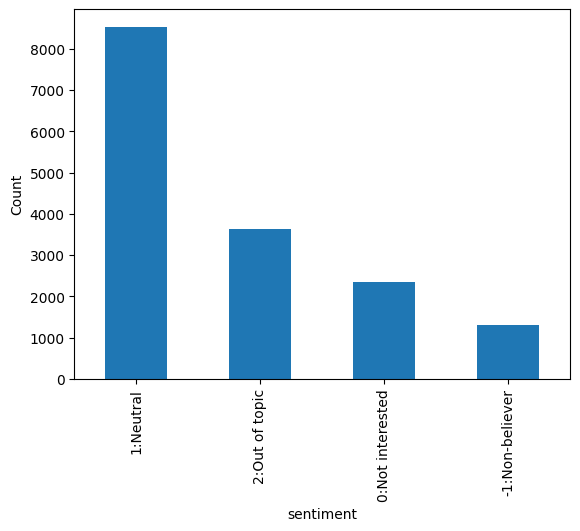

In [72]:
sentiment_labels = {
    '-1': '-1:Non-believer',
    '0': '0:Not interested',
    '1': '1:Neutral',
    '2': '2:Out of topic'
}

ax = raw['sentiment'].value_counts().plot(kind='bar')
unique_sentiments = raw['sentiment'].unique()
ax.set_xticklabels([sentiment_labels.get(str(sentiment), 'Unknown') for sentiment in unique_sentiments])

for i, v in enumerate(raw['sentiment'].value_counts()):
    label = sentiment_labels.get(str(i), 'Unknown')
    
ax.set_ylabel('Count')

plt.show()




The bar graph shows the imbalance between the sentiments

In [73]:
#Checking the hastags
hashtag_list = []  

for message in raw["message"]:
    if message: 
        tags = message.split() 
        for tag in tags:
            tag = "#" + tag.strip(",")  
            tag = tag.lower()  
            hashtag_list.append(tag) 

print(hashtag_list[:20])  


['#polyscimajor', '#epa', '#chief', "#doesn't", '#think', '#carbon', '#dioxide', '#is', '#main', '#cause', '#of', '#global', '#warming', '#and..', '#wait', '#what!?', '#https://t.co/yelvcefxkc', '#via', '#@mashable', "#it's"]


In [74]:
#counting all the hashtags and printing out the unique hastags
hashtag_counts = Counter(hashtag_list)

print("Total unique hashtags:", len(hashtag_counts))

print("unique hashtags:")
for tag, count in hashtag_counts.most_common(7):
    print(tag, "-", count)
#bar graph

Total unique hashtags: 42450
unique hashtags:
#climate - 12328
#change - 9764
#rt - 9708
#the - 7574
#to - 7140
#is - 4317
#of - 4195


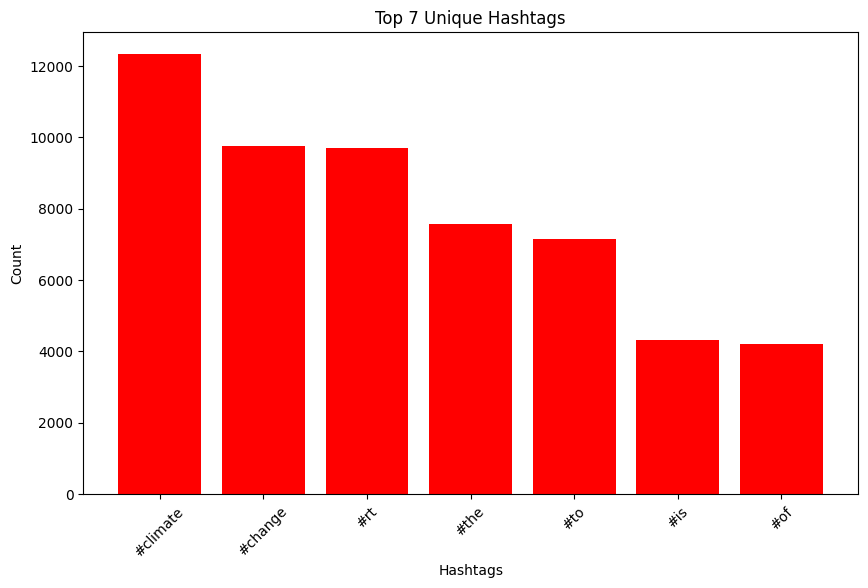

In [75]:
#hashtage bar graph
hashtag_counts = Counter(hashtag_list)
top_hashtags = hashtag_counts.most_common(7)
hashtags, counts = zip(*top_hashtags)

plt.figure(figsize=(10, 6))
plt.bar(hashtags, counts, color='red')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.title('Top 7 Unique Hashtags')
plt.xticks(rotation=45)

plt.show()



The hastage with the highest number was #climate and the one with least hastages was #og

## Text Cleaning

In [76]:
#removing RT
def remove_RT(column_name):
    return re.sub(r'^RT[\s]+', '',column_name)
    #return raw

In [77]:
raw['message']= raw['message'].apply(remove_RT)
raw['message'][4]

"@SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight"

In [78]:
#removing the handles
def remove_handels(post):
    return re.sub('@[^\s]+',' ',post)

In [79]:
raw['message']= raw['message'].apply(remove_handels)
raw.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,Researchers say we have three years to act o...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"It's 2016, and a racist, sexist, climate cha...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,Mike Pence doesn’t believe in global warming...,294933
7,1,Six big things we can ALL do today to fight ...,992717
8,1,My 8yo nephew is inconsolable. He wants to d...,664510
9,1,no offense… but like… how do you just not be...,260471


In [80]:
#removing the url
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
raw['message'] = raw['message'].replace(to_replace = pattern_url,value = " ", regex = True)
print(raw["message"][2])

  Researchers say we have three years to act on climate change before it’s too late    …


In [81]:
#removing the hashtags
def remove_hashtages(post):
    return re.sub('#[^\s]+',' ',post)

In [82]:
raw['message']= raw['message'].apply(remove_hashtages)
print(raw["message"][2])

  Researchers say we have three years to act on climate change before it’s too late    …


In [83]:
#removing the punctuation
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])



In [84]:
raw["message"] = raw["message"].apply(remove_punctuation)
print(raw["message"][2])

  Researchers say we have three years to act on climate change before it’s too late    …


In [85]:
raw.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesnt think carbon dio...,625221
1,1,Its not like we lack evidence of anthropogenic...,126103
2,2,Researchers say we have three years to act o...,698562
3,1,WIRED 2016 was a pivotal year in the war on...,573736
4,1,Its 2016 and a racist sexist climate change ...,466954


<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [86]:
#dealing with imbalances
# Percentage of non spam emails in the dataset 
#len(not_spam)/(len(df))iuo

## Removing noise

In [87]:
#tokenazing
#raw2 = raw.drop(["tweetid"], axis=1)

In [88]:
#raw2 =raw
raw['message'] = raw['message'].str.split()

In [89]:
raw.head()

,sentiment,message,tweetid
0,1,"[PolySciMajor, EPA, chief, doesnt, think, carb...",625221
1,1,"[Its, not, like, we, lack, evidence, of, anthr...",126103
2,2,"[Researchers, say, we, have, three, years, to,...",698562
3,1,"[WIRED, 2016, was, a, pivotal, year, in, the, ...",573736
4,1,"[Its, 2016, and, a, racist, sexist, climate, c...",466954


In [90]:
# steming
stemmer = SnowballStemmer("english")
raw['message'] = raw['message'].apply(lambda x: [stemmer.stem(y) for y in x])

In [91]:
raw['message'][2]

['research',
 'say',
 'we',
 'have',
 'three',
 'year',
 'to',
 'act',
 'on',
 'climat',
 'chang',
 'befor',
 'it',
 'too',
 'late',
 '…']

In [92]:
#removing stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [93]:
#remiving stop words
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [94]:
raw['message'] = raw['message'].apply(remove_stop_words)

In [95]:
raw['message'][2]

['research',
 'say',
 'three',
 'year',
 'act',
 'climat',
 'chang',
 'befor',
 'late',
 '…']

In [96]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def mbti_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [97]:
raw['message'] = raw['message'].apply(mbti_lemma, args=(lemmatizer, ))

In [98]:
raw.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221
1,1,"[like, lack, evid, anthropogen, global, warm]",126103
2,2,"[research, say, three, year, act, climat, chan...",698562
3,1,"[wire, 2016, pivot, year, war, climat, chang]",573736
4,1,"[2016, racist, sexist, climat, chang, deni, bi...",466954


In [99]:
raw['message'][2]

['research',
 'say',
 'three',
 'year',
 'act',
 'climat',
 'chang',
 'befor',
 'late',
 '…']

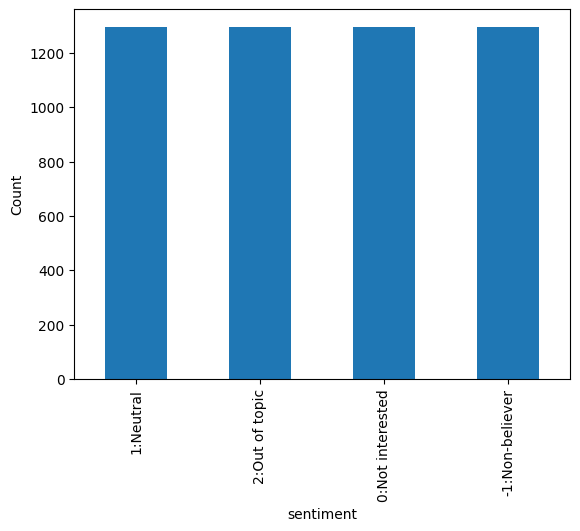

In [100]:
sentiment_counts = raw['sentiment'].value_counts()

minority_class = sentiment_counts.idxmin()
minority_count = sentiment_counts.loc[minority_class]
downsampled_raw = pd.concat([raw[raw['sentiment'] == minority_class]] +
                            [raw[raw['sentiment'] == sentiment].sample(minority_count, replace=False) 
                             for sentiment in sentiment_counts.index if sentiment != minority_class])
ax = downsampled_raw['sentiment'].value_counts().plot(kind='bar')
ax.set_xticklabels([sentiment_labels.get(str(sentiment), 'Unknown') for sentiment in sentiment_counts.index])
ax.set_ylabel('Count')
plt.show()


In [101]:
y = raw['sentiment']

# features
X = raw.drop(['sentiment'], axis=1)

In [102]:
X.head()

,message,tweetid
0,"[polyscimajor, epa, chief, doesnt, think, carb...",625221
1,"[like, lack, evid, anthropogen, global, warm]",126103
2,"[research, say, three, year, act, climat, chan...",698562
3,"[wire, 2016, pivot, year, war, climat, chang]",573736
4,"[2016, racist, sexist, climat, chang, deni, bi...",466954


In [103]:
X["message"] = X["message"].apply(' '.join)

In [104]:
X.head()

,message,tweetid
0,polyscimajor epa chief doesnt think carbon dio...,625221
1,like lack evid anthropogen global warm,126103
2,research say three year act climat chang befor...,698562
3,wire 2016 pivot year war climat chang,573736
4,2016 racist sexist climat chang deni bigot lea...,466954


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [105]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34283, random_state=42)


In [106]:
X_train =  X_train.drop(['tweetid'], axis=1)
X_test_id =  pd.DataFrame(X_test["tweetid"].reset_index(drop= True))
X_test =  X_test.drop(['tweetid'], axis=1)

In [107]:
X_test_id

,tweetid
0,697253
1,94360
2,704751
3,953950
4,416734
...,...
5419,575317
5420,296926
5421,99084
5422,728959


In [108]:
#conveting word into numbers.
from sklearn.feature_extraction.text import CountVectorizer

betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5,
                             ngram_range=(1, 1))

In [109]:

X_train_fitted = betterVect.fit_transform(X_train["message"])
X_test_counts = betterVect.transform(X_test["message"])


# logistic regression model

In [110]:
# train the logistic regression model.
lr = LogisticRegression(max_iter= 10000000000)
lr.fit(X_train_fitted.toarray(), y_train)

LogisticRegression(max_iter=10000000000)

In [111]:
predictions = lr.predict(X_test_counts)
print(predictions)

[1 1 0 ... 1 2 1]


In [112]:
lr_pred = pd.DataFrame(predictions)
lr_pred = lr_pred.rename(columns = {0:"sentiment"})

results = pd.merge(X_test_id, lr_pred, left_index =True, right_index =True)

results.to_csv("logistic_predictions.csv", index = False)
results

,tweetid,sentiment
0,697253,1
1,94360,1
2,704751,0
3,953950,-1
4,416734,1
...,...,...
5419,575317,1
5420,296926,1
5421,99084,1
5422,728959,2


In [113]:
print(y_test)

9059     1
169      2
5331     1
6333    -1
10383    0
        ..
11354    0
7248     1
12821    1
10638    2
8382     1
Name: sentiment, Length: 5424, dtype: int64


In [114]:
#Intercept
lr.intercept_[0]

-1.17249593922856

In [115]:
#Coefficients
#coeff_df = pd.DataFrame(lr.coef_.T,X.columns,columns=['Coefficient'])
#coeff_df.head()

In [116]:
#Assessing Model Performance using the Confusion Matrix
from sklearn.metrics import confusion_matrix

In [117]:
confusion_matrix(y_test, predictions)

array([[ 174,   75,  182,   17],
       [  33,  328,  338,   62],
       [  49,  202, 2457,  265],
       [  12,   46,  343,  841]], dtype=int64)

In [122]:
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of predictions: {predictions.shape}")
print(f"Type of y_test: {type(y_test)}")
print(f"Type of predictions: {type(predictions)}")

Shape of y_test: (5424,)
Shape of predictions: (5424,)
Type of y_test: <class 'pandas.core.series.Series'>
Type of predictions: <class 'numpy.ndarray'>


In [123]:
y_test1 = y_test.to_numpy()

f1 = f1_score(y_test1, predictions)
precision = precision_score(y_test1, predictions)
recall = recall_score(y_test1, predictions)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
params = {"random_state":7,
          "model-type": "logreg",
          "scaler": "standard scaler",
          "param_grid": str(param_grid),
          "stratify": True
         }

metrics= {"f1" : f1,
          "recall": recall,
          "precision": precision,
         }

In [ ]:
experiment.log_parameters(params)
experiment.log_parameters(metrics)
expirement.end()

In [ ]:
#Confusion Matrix
labels = ['0: not interested', '1: nutural', "-1: non beliver", "2:out of topic"]

pd.DataFrame(data=confusion_matrix(y_test, predictions), index=labels, columns=labels)

In [ ]:
#Classification Report in sklearn

print('Classification Report')
print(classification_report(y_test, pred_lm, target_names=['0: not interested', '1: nutural', "-1: non beliver", "2:out of topic"]))

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))


In [ ]:
new df = pd.DataFrame()

# Decision Tree Classification Model

In [ ]:
#Standarise the data
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_test_counts = standard_scaler.fit_transform(X)

In [ ]:
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
tree.fit(X_train, y_train)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

In [ ]:
raw = pd.DataFrame({'tweetid': tweetid_list, 'sentiment': sentiment_list})
raw.to_pickle('train.pkl')

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---